In [1]:
import numpy as np
from netCDF4 import Dataset
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import wrf

In [2]:
# Load netcdf file
data_dir = './'
wrf_filename = '%straining.nc' % data_dir
ncf = Dataset(wrf_filename, "r", format="NETCDF4")

In [3]:
target_cols = [
    'ccn_001',
     'ccn_003',
     'ccn_006',
     'CHI',
     'CHI_CCN',
     'D_ALPHA',
     'D_GAMMA',
     'D_ALPHA_CCN',
     'D_GAMMA_CCN',
     'PM25'
]

target_cols = [
 'ald2',
 'hcooh',
 'RCOOH',
 'Z',
 'P',
 'aro1',
 'aro2',
 'alk1',
 'ole1',
 'api1',
 'api2',
 'lim1',
 'lim2',
 'par',
 'AONE',
 'mgly',
 'eth',
 'OLET',
 'OLEI',
 'tol',
 'xyl',
]


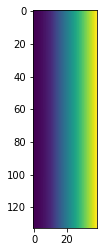

In [12]:
pres = ncf.variables['Z'][:].mean(axis=(2,3))

plt.imshow(pres)

In [13]:
pres.std(axis=0)

masked_array(data=[0.1829281449317932, 0.5806048512458801,
                   1.0342762470245361, 1.5266449451446533,
                   2.0584325790405273, 2.612290620803833,
                   3.1485767364501953, 3.6578288078308105,
                   4.108290672302246, 4.455113410949707,
                   4.710293292999268, 4.954628944396973,
                   5.345404148101807, 6.040634632110596,
                   7.208815574645996, 8.874372482299805,
                   10.913490295410156, 13.145139694213867,
                   15.393978118896484, 17.565650939941406,
                   19.592666625976562, 21.328371047973633,
                   22.665517807006836, 23.624008178710938,
                   24.18025016784668, 24.0997257232666, 22.97226333618164,
                   20.470399856567383, 16.860570907592773,
                   12.893409729003906, 9.226348876953125,
                   6.261143207550049, 4.158207416534424,
                   2.8972601890563965, 2.28512120246

(array([ 532.,  266.,  266.,  266.,  266.,  399.,  399.,  665.,  832.,
        1296.]),
 array([6.5903716, 6.924489 , 7.258607 , 7.5927243, 7.9268417, 8.26096  ,
        8.595077 , 8.929194 , 9.263312 , 9.597429 , 9.931547 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

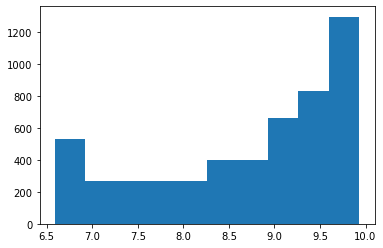

In [15]:
plt.hist( np.log(pres.flatten()) )

In [6]:
(pres == 0).sum()

0

In [5]:
for i in range(133):
    plt.semilogy(mean_var[i])
    
# plt.semilogy(ncf.variables[target_cols[0]][50,:, 13, 89], color='k')
# plt.semilogy(ncf.variables[target_cols[0]][50,:, 150, 140], color='k')
# plt.semilogy(ncf.variables[target_cols[0]][50,:, 13, 150], color='k')

NameError: name 'mean_var' is not defined

In [6]:
ncf.variables['Times'][i].data.astype(str)

array(['2', '0', '1', '0', '-', '0', '6', '-', '1', '8', '_', '0', '0',
       ':', '0', '0', ':', '0', '0'], dtype='<U1')

In [9]:
time_axis = ["".join( ncf.variables['Times'][i].data.astype(str))[-8:] for i in range(133)]
time_axis

['00:00:00',
 '00:10:00',
 '00:20:00',
 '00:30:00',
 '00:40:00',
 '00:50:00',
 '01:00:00',
 '01:10:00',
 '01:20:00',
 '01:30:00',
 '01:40:00',
 '01:50:00',
 '02:00:00',
 '02:10:00',
 '02:20:00',
 '02:30:00',
 '02:40:00',
 '02:50:00',
 '03:00:00',
 '03:10:00',
 '03:20:00',
 '03:30:00',
 '03:40:00',
 '03:50:00',
 '04:00:00',
 '04:10:00',
 '04:20:00',
 '04:30:00',
 '04:40:00',
 '04:50:00',
 '05:00:00',
 '05:10:00',
 '05:20:00',
 '05:30:00',
 '05:40:00',
 '05:50:00',
 '06:00:00',
 '06:10:00',
 '06:20:00',
 '06:30:00',
 '06:40:00',
 '06:50:00',
 '07:00:00',
 '07:10:00',
 '07:20:00',
 '07:30:00',
 '07:40:00',
 '07:50:00',
 '08:00:00',
 '08:10:00',
 '08:20:00',
 '08:30:00',
 '08:40:00',
 '08:50:00',
 '09:00:00',
 '09:10:00',
 '09:20:00',
 '09:30:00',
 '09:40:00',
 '09:50:00',
 '10:00:00',
 '10:10:00',
 '10:20:00',
 '10:30:00',
 '10:40:00',
 '10:50:00',
 '11:00:00',
 '11:10:00',
 '11:20:00',
 '11:30:00',
 '11:40:00',
 '11:50:00',
 '12:00:00',
 '12:10:00',
 '12:20:00',
 '12:30:00',
 '12:40:00',

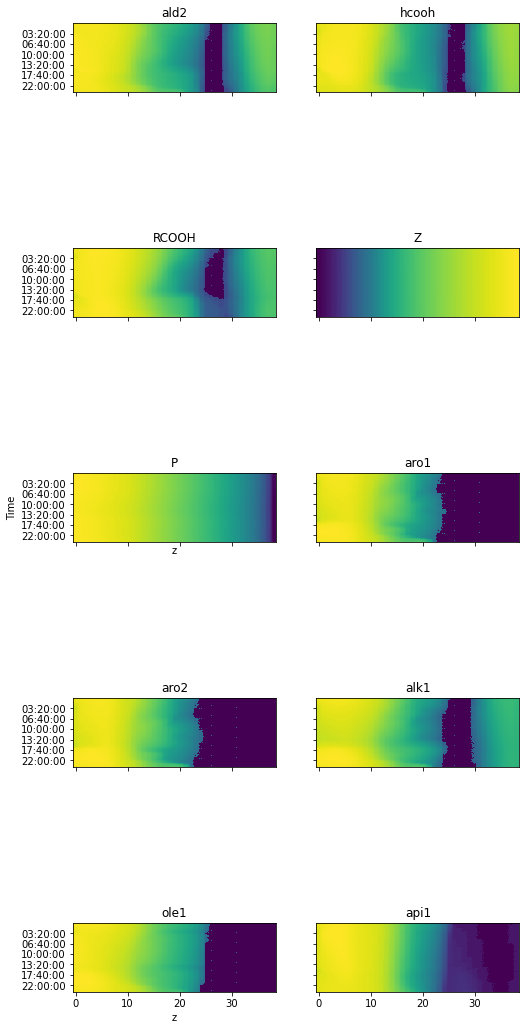

In [13]:
f,axes = plt.subplots(5,2, sharex=True, sharey=True, figsize=(8, 20))


for i in range(10):
    ax = axes.flat[i]
    mean_var =  np.mean(ncf.variables[target_cols[i]],axis=(2,3))
    im = ax.imshow(mean_var,norm=colors.LogNorm())


    yticks = [20, 40, 60, 80, 100, 120]
    ylabel = [time_axis[i] for i in yticks]

    ax.set_yticks(yticks)
    
    if i == 4:
        ax.set_yticklabels(ylabel, rotation=0)
        ax.set_xlabel('z')
        ax.set_ylabel('Time')
    if i == 8:
        ax.set_xlabel('z')
    
    ax.set_aspect(1/10)
    ax.set_title(target_cols[i])
#     f.colorbar(im,ax=ax,orientation='horizontal')

In [92]:
# https://pytorch-tabular.readthedocs.io/en/latest/tutorials/02-Advanced_Usage/

In [122]:
time_axis = ["".join( ncf.variables['Times'][i].data.astype(str))[-8:] for i in range(133)]
hrs  = [float(time_axis[i].split(":")[0]) for i in range(len(time_axis))]
mins_in_hrs = [float(time_axis[i].split(":")[1])/60 for i in range(len(time_axis))]

timestamp_hrs = np.array([(h+m)/24 for h,m in zip(hrs, mins_in_hrs)])
time_embed = np.cos(timestamp_hrs*np.pi*2)
# plt.plot(timestamp_hrs, np.cos(timestamp_hrs*np.pi*2))

(-0.00944773790479701, 0.716876744185448)

In [94]:
std_var =  np.std(ncf.variables[target_cols[0]],axis=(2,3))

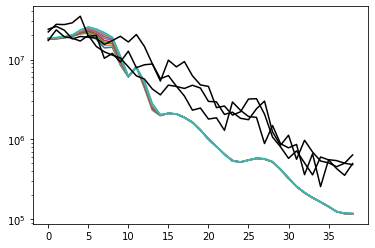

In [95]:
for i in range(10):
    plt.semilogy(std_var[i])
    
plt.semilogy(ncf.variables[target_cols[0]][50,:, 13, 89], color='k')
plt.semilogy(ncf.variables[target_cols[0]][50,:, 150, 140], color='k')

plt.semilogy(ncf.variables[target_cols[0]][50,:, 13, 150], color='k')